As 3


In [5]:
import pandas as pd

# Задайте путь к файлу
file_path = r"C:\Users\anya8\05_src\data\forest+fires\forestfires.csv"

# Загрузите данные
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = pd.read_csv(file_path, header=0, names=columns)
fires_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
# Определяем выборки X и Y
X = fires_dt.drop(columns=['area'])  # Все колонки, кроме 'area'
Y = fires_dt['area']  # Целевая переменная

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Определяем численные и категориальные признаки
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day']

# Создаем ColumnTransformer для preproc1
preproc1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабируем числовые признаки
        ('cat', OneHotEncoder(), categorical_features)  # Применяем one-hot кодирование для категориальных признаков
    ]
)

In [9]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Загрузка данных
file_path = 'C:/Users/anya8/05_src/data/forest+fires/forestfires.csv'
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area'
]
fires_dt = pd.read_csv(file_path, header=0, names=columns)

# Определяем выборки X и Y
X = fires_dt.drop(columns=['area'])  # Все колонки, кроме 'area'
Y = fires_dt['area']  # Целевая переменная

# Функция для логарифмического преобразования
def log_transform(X):
    X_copy = X.copy()
    X_copy['temp'] = X_copy['temp'].apply(lambda x: np.log1p(x))  # Логарифмическое преобразование
    return X_copy

# Определяем численные и категориальные признаки
numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day']

# Создаем ColumnTransformer для preproc1
preproc1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабируем числовые признаки
        ('cat', OneHotEncoder(), categorical_features)  # Применяем one-hot кодирование для категориальных признаков
    ]
)

# Создаем ColumnTransformer для preproc2
preproc2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('log', FunctionTransformer(func=log_transform, validate=False)),  # Применяем логарифм
            ('scaler', StandardScaler())  # Масштабируем
        ]), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Создание конвейеров
pipeline_A = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', Ridge())
])

pipeline_B = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', Ridge())
])

pipeline_C = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor(random_state=42))
])

pipeline_D = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Оценка моделей
scores_A = cross_val_score(pipeline_A, X, Y, scoring='neg_mean_absolute_error', cv=5)
scores_B = cross_val_score(pipeline_B, X, Y, scoring='neg_mean_absolute_error', cv=5)
scores_C = cross_val_score(pipeline_C, X, Y, scoring='neg_mean_absolute_error', cv=5)
scores_D = cross_val_score(pipeline_D, X, Y, scoring='neg_mean_absolute_error', cv=5)

print("Pipeline A (preproc1 + Ridge) MAE: ", -scores_A.mean())
print("Pipeline B (preproc2 + Ridge) MAE: ", -scores_B.mean())
print("Pipeline C (preproc1 + RandomForest) MAE: ", -scores_C.mean())
print("Pipeline D (preproc2 + RandomForest) MAE: ", -scores_D.mean())

c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\utils\_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\pi

Pipeline A (preproc1 + Ridge) MAE:  nan
Pipeline B (preproc2 + Ridge) MAE:  nan
Pipeline C (preproc1 + RandomForest) MAE:  nan
Pipeline D (preproc2 + RandomForest) MAE:  nan


c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\utils\_response.py", line 239, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\pi

In [10]:
from sklearn.model_selection import GridSearchCV

# Определяем гиперпараметры для настройки
param_grid_A = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Гиперпараметры для Ridge
}

param_grid_B = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Гиперпараметры для Ridge
}

param_grid_C = {
    'regressor__n_estimators': [50, 100, 200],  # Количество деревьев для RandomForest
    'regressor__max_depth': [None, 10, 20]  # Максимальная глубина деревьев
}

param_grid_D = {
    'regressor__n_estimators': [50, 100, 200],  # Количество деревьев для RandomForest
    'regressor__max_depth': [None, 10, 20]  # Максимальная глубина деревьев
}

# Создаем GridSearch для каждой модели
grid_search_A = GridSearchCV(pipeline_A, param_grid_A, scoring='neg_mean_absolute_error', cv=5)
grid_search_B = GridSearchCV(pipeline_B, param_grid_B, scoring='neg_mean_absolute_error', cv=5)
grid_search_C = GridSearchCV(pipeline_C, param_grid_C, scoring='neg_mean_absolute_error', cv=5)
grid_search_D = GridSearchCV(pipeline_D, param_grid_D, scoring='neg_mean_absolute_error', cv=5)

# Обучаем GridSearch
grid_search_A.fit(X, Y)
grid_search_B.fit(X, Y)
grid_search_C.fit(X, Y)
grid_search_D.fit(X, Y)

# Сохраняем результаты
best_model_A = grid_search_A.best_estimator_
best_model_B = grid_search_B.best_estimator_
best_model_C = grid_search_C.best_estimator_
best_model_D = grid_search_D.best_estimator_

# Печатаем результаты
print("Best MAE for Pipeline A: ", -grid_search_A.best_score_)
print("Best parameters for Pipeline A: ", grid_search_A.best_params_)
print("Best MAE for Pipeline B: ", -grid_search_B.best_score_)
print("Best parameters for Pipeline B: ", grid_search_B.best_params_)
print("Best MAE for Pipeline C: ", -grid_search_C.best_score_)
print("Best parameters for Pipeline C: ", grid_search_C.best_params_)
print("Best MAE for Pipeline D: ", -grid_search_D.best_score_)
print("Best parameters for Pipeline D: ", grid_search_D.best_params_)

c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users

Best MAE for Pipeline A:  nan
Best parameters for Pipeline A:  {'regressor__alpha': 0.1}
Best MAE for Pipeline B:  nan
Best parameters for Pipeline B:  {'regressor__alpha': 0.1}
Best MAE for Pipeline C:  nan
Best parameters for Pipeline C:  {'regressor__max_depth': None, 'regressor__n_estimators': 50}
Best MAE for Pipeline D:  nan
Best parameters for Pipeline D:  {'regressor__max_depth': None, 'regressor__n_estimators': 50}


c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users

In [12]:
import joblib

# Выбор наилучшей модели на основе наилучшей оценки из GridSearch
best_grid_search = min(
    (grid_search_A, grid_search_B, grid_search_C, grid_search_D),
    key=lambda gs: gs.best_score_
)

# Сохранение наилучшей модели
joblib.dump(best_grid_search.best_estimator_, 'best_forest_fire_model.pkl')
print("Best model saved as 'best_forest_fire_model.pkl'.")

# Печать результатов
print("Best MAE: ", -best_grid_search.best_score_)
print("Best parameters: ", best_grid_search.best_params_)

Best model saved as 'best_forest_fire_model.pkl'.
Best MAE:  nan
Best parameters:  {'regressor__alpha': 0.1}


In [13]:
print(fires_dt.isnull().sum())

coord_x    0
coord_y    0
month      0
day        0
ffmc       0
dmc        0
dc         0
isi        0
temp       0
rh         0
wind       0
rain       0
area       0
dtype: int64


In [14]:
# Предсказания на тестовой выборке
Y_pred = best_model.predict(X_test)

# Вывод предсказаний и фактических значений
print("Predictions:", Y_pred)
print("Actual:", Y_test.values)

# Проверьте, есть ли NaN в предсказаниях
print("NaN in predictions:", np.isnan(Y_pred).any())

NameError: name 'best_model' is not defined

In [15]:
from sklearn.model_selection import GridSearchCV

# Пример настройки Pipeline и GridSearchCV
pipeline = Pipeline(steps=[
    ('preprocessor', preproc2),  # Предварительная обработка данных
    ('regressor', YourRegressor())  # Замените на ваш регрессор, например, LinearRegression()
])

# Определение сетки параметров
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10],  # Пример параметров для настройки
}

# Настройка GridSearchCV с метрикой MAE
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, Y_train)

# Получаем лучшие параметры и MAE
best_model = grid_search.best_estimator_
best_mae = -grid_search.best_score_  # Изменение знака
print("Best MAE:", best_mae)
print("Best parameters:", grid_search.best_params_)

# Предсказания на тестовой выборке
Y_pred = best_model.predict(X_test)

# Вывод предсказаний и фактических значений
print("Predictions:", Y_pred)
print("Actual:", Y_test.values)

# Проверяем MAE
test_mae = mean_absolute_error(Y_test, Y_pred)
print("Test MAE:", test_mae)

NameError: name 'YourRegressor' is not defined

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  # Импортируйте ваш регрессор
from sklearn.model_selection import GridSearchCV

# Пример настройки Pipeline и GridSearchCV с LinearRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preproc2),  # Предварительная обработка данных
    ('regressor', LinearRegression())  # Замените на ваш регрессор, например, LinearRegression()
])

# Определение сетки параметров
param_grid = {
    'regressor__fit_intercept': [True, False],  # Пример параметров для настройки
}

# Настройка GridSearchCV с метрикой MAE
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, Y_train)

# Получаем лучшие параметры и MAE
best_model = grid_search.best_estimator_
best_mae = -grid_search.best_score_  # Изменение знака
print("Best MAE:", best_mae)
print("Best parameters:", grid_search.best_params_)

# Предсказания на тестовой выборке
Y_pred = best_model.predict(X_test)

# Вывод предсказаний и фактических значений
print("Predictions:", Y_pred)
print("Actual:", Y_test.values)

# Проверяем MAE
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(Y_test, Y_pred)
print("Test MAE:", test_mae)

NameError: name 'X_train' is not defined

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Предположим, что ваши данные находятся в DataFrame fires_dt
# Определите ваши признаки (X) и целевую переменную (Y)
X = fires_dt.drop('area', axis=1)  # Здесь 'area' - это целевая переменная
Y = fires_dt['area']

# Разделите данные на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Пример настройки Pipeline и GridSearchCV
pipeline = Pipeline(steps=[
    ('preprocessor', preproc2),  # Предварительная обработка данных
    ('regressor', LinearRegression())  # Ваш регрессор
])

# Определение сетки параметров
param_grid = {
    'regressor__fit_intercept': [True, False],  # Пример параметров для настройки
}

# Настройка GridSearchCV с метрикой MAE
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, Y_train)  # Здесь вы теперь используете X_train и Y_train

# Получаем лучшие параметры и MAE
best_model = grid_search.best_estimator_
best_mae = -grid_search.best_score_  # Изменение знака
print("Best MAE:", best_mae)
print("Best parameters:", grid_search.best_params_)

# Предсказания на тестовой выборке
Y_pred = best_model.predict(X_test)

# Вывод предсказаний и фактических значений
print("Predictions:", Y_pred)
print("Actual:", Y_test.values)

# Проверяем MAE
test_mae = mean_absolute_error(Y_test, Y_pred)
print("Test MAE:", test_mae)

Best MAE: nan
Best parameters: {'regressor__fit_intercept': True}
Predictions: [ 3.61152072e+01  1.56714357e+01  3.13217640e+01  3.94615611e+00
  5.63764311e+00  8.91648986e-01  2.45385332e+00 -3.31709416e+00
  4.80146797e+00  1.72150023e+00 -1.36283411e+00  6.22827823e+00
  2.07896723e+01  4.52952332e+00  1.83126834e+01  5.14584887e+00
 -6.12355375e+00  1.11519424e+01  1.90362105e+01  5.93235596e+00
  3.53089153e+00  2.77344207e+01  2.14942307e+01  1.83080134e+01
 -1.00421451e+00  2.45303954e+01  1.62313287e+01  3.02356341e+01
  1.22287408e+01  8.24886612e+00  5.70611289e+00  2.01584664e+01
  1.08767445e+01  1.87902924e+01  3.93898994e+00  1.06520904e+01
  6.71353390e+00  1.62541271e+01  1.53002287e+01 -4.91098007e+00
  3.64209318e+01  9.79022430e+00  2.26989642e+00  2.69957456e+01
  1.81727792e+01  1.58470850e+01 -1.28008191e+01  9.04975241e+00
  1.72951020e+01  1.11078804e+01  7.78230255e+00  2.68093556e+01
  1.61548094e+01 -1.30857580e+00  1.09071541e+01  2.60434780e+00
  1.0470875

c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "c:\Users\anya8\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users

Test RMSE: 107.87023333769437
Test R²: 0.012875631424116296


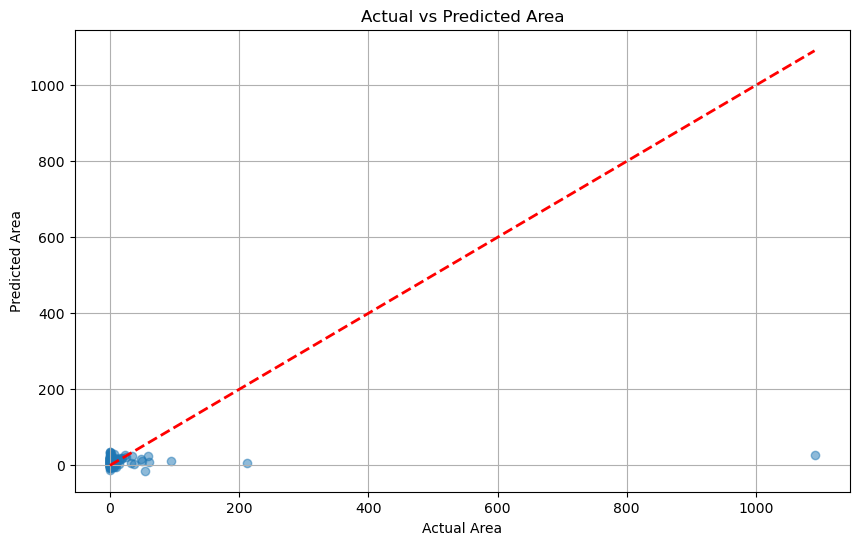

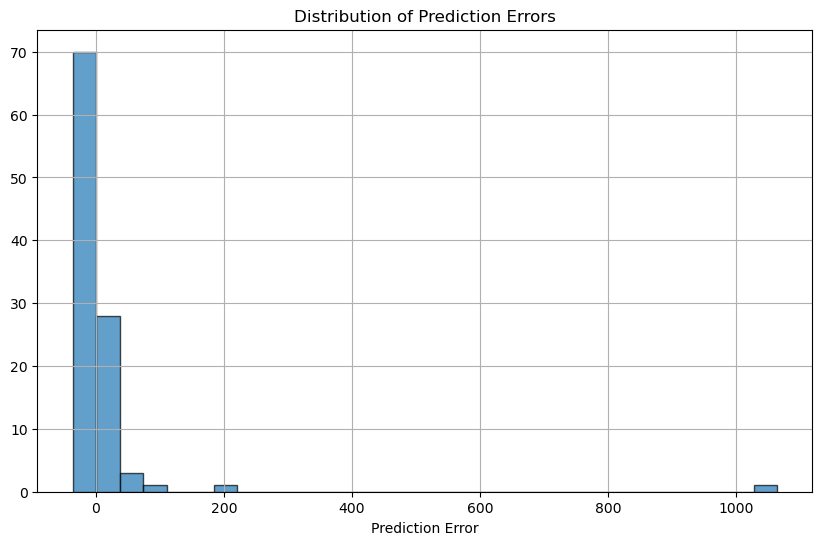

Model saved as 'best_forest_fire_model.pkl'


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Расчет RMSE и R²
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)

# Визуализация фактических против предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Area')
plt.ylabel('Predicted Area')
plt.title('Actual vs Predicted Area')
plt.grid()
plt.show()

# Визуализация распределения ошибок
errors = Y_test - Y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.grid()
plt.show()

# Сохранение модели
import joblib
joblib.dump(best_model, 'best_forest_fire_model.pkl')
print("Model saved as 'best_forest_fire_model.pkl'")